In [5]:
import pandas as pd                      #We use Pandas analyze large data.
import numpy as np                       #NumPy arrays are faster and more compact than Python lists.
import seaborn as sns                    #Seaborn helps you explore and understand our data.
import matplotlib.pyplot as plt          #matplot is use for representation of graphs.
import itertools                         #iterate over data structures that can be stepped over using a for loop.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras import layers

In [6]:
df = pd.read_csv("seattle weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [8]:
df.info() #Information about DataFrames

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_numeric(df['date'])
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1325376000000000000,0.0,12.8,5.0,4.7,drizzle
1,1325462400000000000,10.9,10.6,2.8,4.5,rain
2,1325548800000000000,0.8,11.7,7.2,2.3,rain
3,1325635200000000000,20.3,12.2,5.6,4.7,rain
4,1325721600000000000,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,1451174400000000000,8.6,4.4,1.7,2.9,rain
1457,1451260800000000000,1.5,5.0,1.7,1.3,rain
1458,1451347200000000000,0.0,7.2,0.6,2.6,fog
1459,1451433600000000000,0.0,5.6,-1.0,3.4,sun


In [10]:
df['weather'] = df['weather'].replace(['drizzle','rain','sun','snow','fog'],[0,1,2,3,4])
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1325376000000000000,0.0,12.8,5.0,4.7,0
1,1325462400000000000,10.9,10.6,2.8,4.5,1
2,1325548800000000000,0.8,11.7,7.2,2.3,1
3,1325635200000000000,20.3,12.2,5.6,4.7,1
4,1325721600000000000,1.3,8.9,2.8,6.1,1
...,...,...,...,...,...,...
1456,1451174400000000000,8.6,4.4,1.7,2.9,1
1457,1451260800000000000,1.5,5.0,1.7,1.3,1
1458,1451347200000000000,0.0,7.2,0.6,2.6,4
1459,1451433600000000000,0.0,5.6,-1.0,3.4,2


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector #used for columnar data, to transformations into a single transformer.
X = df.copy()
y = X.pop('weather')
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=np.number)),
)

X = preprocessor.fit_transform(X)
y = y

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [1778]


Epoch 1/800
12/12 [==============================] - 1s 7ms/step - loss: 2.3162
Epoch 2/800
12/12 [==============================] - 0s 7ms/step - loss: 0.7658
Epoch 3/800
12/12 [==============================] - 0s 6ms/step - loss: 0.5196
Epoch 4/800
12/12 [==============================] - 0s 6ms/step - loss: 0.4310
Epoch 5/800
12/12 [==============================] - 0s 6ms/step - loss: 0.3514
Epoch 6/800
12/12 [==============================] - 0s 8ms/step - loss: 0.2966
Epoch 7/800
12/12 [==============================] - 0s 8ms/step - loss: 0.2470
Epoch 8/800
12/12 [==============================] - 0s 7ms/step - loss: 0.2029
Epoch 9/800
12/12 [==============================] - 0s 7ms/step - loss: 0.1572
Epoch 10/800
12/12 [==============================] - 0s 6ms/step - loss: 0.1150
Epoch 11/800
12/12 [==============================] - 0s 6ms/step - loss: 0.0785
Epoch 12/800
12/12 [==============================] - 0s 7ms/step - loss: 0.0487
Epoch 13/800
12/12 [=================

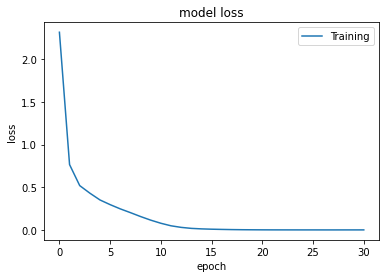

In [12]:
#keras.Sequential is used for analysis and comparison of simple neural network-oriented models.
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),])


model.compile(
    optimizer='adam',
    loss='mse')

#early stopping
callback = keras.callbacks.EarlyStopping(
    monitor='loss', 
    patience=3)
history = model.fit(
    X, y,
    batch_size=128,
    epochs=800,                 #number of times the entire data set has to be worked through the learning algorithm
    callbacks=[callback])

#Display loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'val'], loc='upper right')
plt.show()

<AxesSubplot:xlabel='temp_max', ylabel='temp_min'>

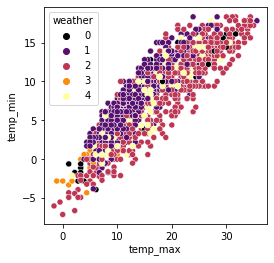

In [13]:
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'temp_max', y = 'temp_min', hue = 'weather' , palette = 'inferno',data = df)

46/46 [==============================] - 0s 3ms/step


<AxesSubplot:title={'center':'Predicted weather'}, xlabel='date', ylabel='temp_max'>

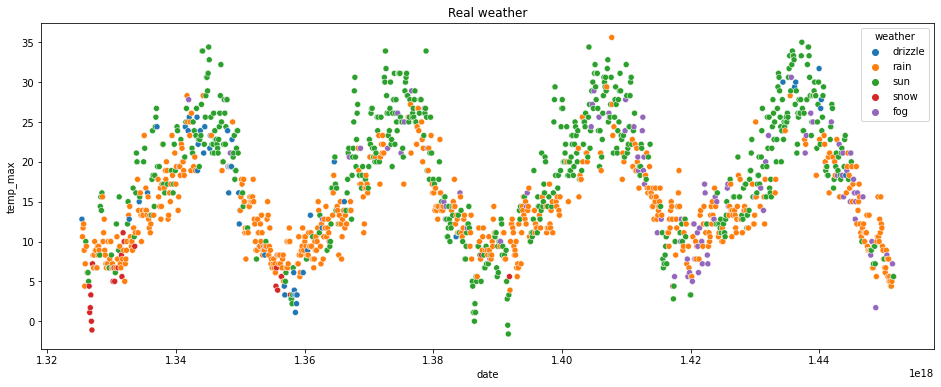

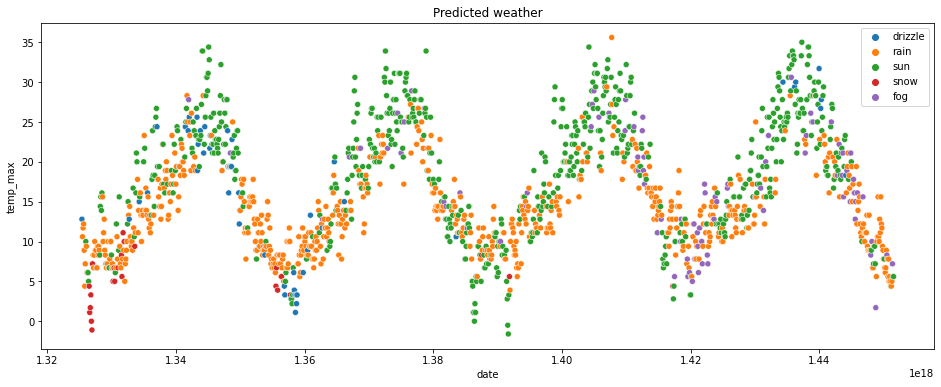

In [14]:
predictions = model.predict(X)

#reshape to display, round to convert to binary.
predictions = predictions.reshape(predictions.size)
predictions = np.round_(predictions)

#Convert to text format.
df['weather'] = df['weather'].replace([0,1,2,3,4],['drizzle','rain','sun','snow','fog'])
predictions = predictions.astype(str)
predictions = np.char.replace(predictions,'-0.0','drizzle')
predictions = np.char.replace(predictions,'0.0','drizzle')
predictions = np.char.replace(predictions,'1.0','rain')
predictions = np.char.replace(predictions,'2.0','sun')
predictions = np.char.replace(predictions,'3.0','snow')
predictions = np.char.replace(predictions,'4.0','fog')

#Real weather.
plt.figure(figsize=(16,6))
plt.title("Real weather")
sns.scatterplot(x=df['date'], y=df['temp_max'],hue=df['weather'])
plt.figure(figsize=(16,6))
plt.title("Predicted weather")
sns.scatterplot(x=df['date'], y=df['temp_max'],hue=predictions)

<AxesSubplot:>

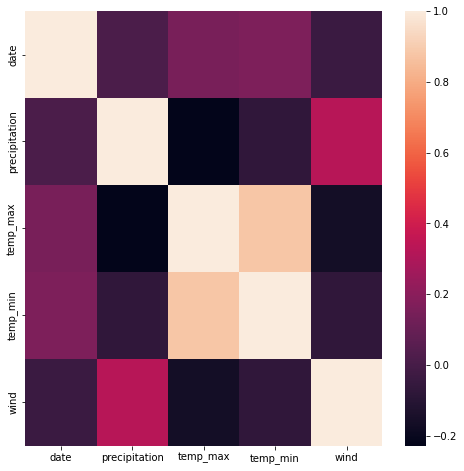

In [17]:
plt.figure(figsize = (8,8))
sns.heatmap(df .corr())

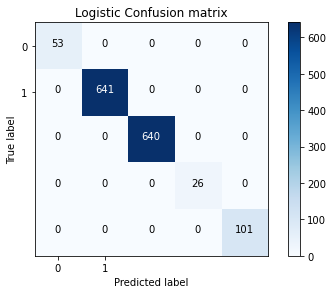

Accuracy  =     1.000
Precision =     1.000
Recall    =     1.000
F1_score  =     1.000


In [24]:
res = pd.DataFrame({
    "df":df['weather'],
    "pred":predictions
})

res['df'] = res['df'].replace(['drizzle','rain','sun','snow','fog'],[0,1,2,3,4])
res['pred'] = res['pred'].replace(['drizzle','rain','sun','snow','fog'],[0,1,2,3,4])

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))
cm = confusion_matrix(res['df'], res['pred'])
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.show()

show_metrics()